<a href="https://colab.research.google.com/github/dSudario9/Modelos-Supervisionados-Diversos/blob/main/Metricas_e_Avaliacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import biblioteca 
import pandas as pd

In [ ]:
# Import Base de dados 
df = pd.read_csv("/content/breast_cancer.csv")

In [ ]:
# Vizualizar DataSet 
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target,target_name
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant


In [ ]:
# Excluindo Colunas nao ultilizadas .
X = df.drop(columns=["target", "target_name"])

# Definindo Target alvo 
Y = df[["target"]]

***Separando base de dados em Train e Test ***

In [ ]:
# Biblioteca 
from sklearn.model_selection import train_test_split

In [ ]:
# Selecionando base de dados deixando 20% para Test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

***Criando Classificador ***

In [ ]:
# Import de Biblioteca do Classificador RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Classificador criado ..
clf = RandomForestClassifier()

***Treinando Modelo ***

In [ ]:
# Train 

clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Fazendo Predição do Modelo . 
y_pred = clf.predict(X_test)

Metricas 

In [ ]:
# Import de Metrics, Accuracy ,Precission score ,F1 Score , Recal score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [ ]:
# Mostrando Resultados das Metricas selecionadas. 
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 97.36842105263158%
Precision: 98.66666666666667%
Recall: 97.36842105263158%
F1: 98.01324503311258%


Observando as metricas acimas vimos  que nem sempre a Acurácia é o melhor resultado para uma base desbalanceada, pois as metricas de Precision e F1 score podem dar um melhor resultado. Em caso de falsos positivos e falsos negativos que podem inflienciar no resultado do seu modelo, indicamos que use as metricas com melhor resultados como Recall, F1 score , elas podem apresentar melhor solução para o problema. 

**Vamos ver um resumo das principais ações usando o metodo  classification_report**

In [2]:
# Import Biblioteca e Classificador. 
from sklearn.metrics import classification_report

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.99      0.97      0.98        76

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Nesse Resumo temos as colunas de Precission, Recall , F1 score, associada as classes Zero (0) que representa nossa Dataset e um (1) que representa a segunda classe, uma vez que estamos tratando de um problema  binario, mostrando a metrica de cada classe e em suport estão os registro associados para conseguir as os resultados ou seja as metricas de cada  classe.

***Nesse Ponto vamos verificar como esta a Matriz de confusão para entender como estao nossos dados verdadeiros positivos e verdadeiros negativos etc. ***

In [ ]:
# Import Classificador e biblioteca de plot graficos. 

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

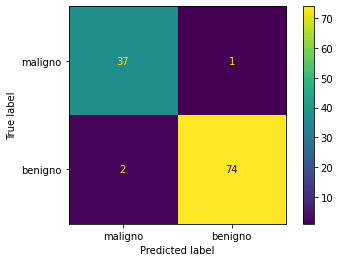

In [ ]:
# Vizualizando Matriz de confusão 
plot_confusion_matrix(clf, X_test, y_test, display_labels=["maligno", "benigno"], values_format='d')
plt.grid(False)
plt.show()

Observando o grafico , vimos que tivemos três classificações erradas, uma que era maligno e o foi classificado como Benigno  e duas que era Benigno e foi classificado como Maligno, mais o que mais importa sao os valores altors na diagonal onde tivemos um resultado satisfatorio . de Benigno 74 e Maligno 37. 

***Uma outra forma de analisarmos e a Curva Roc. ***

In [ ]:
# Import de Classificador 
from sklearn.metrics import plot_roc_curve

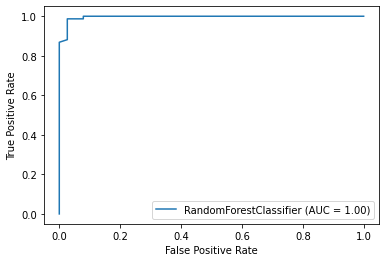

In [ ]:
# Plot dos dados. 
plot_roc_curve(clf, X_test, y_test)
plt.show()

 ***Nesse Classificador podemos ver que  na nossa curva roc tivemos uma taxa de falsos positivos baixos e uma taxa de verdadeiros positivos alto. 
AUC = área por baixo da curva 1% quanto mais biaxa a ac melhor nosso classificador.